Figure S1A-M (13 subgifures) from Mahdavi & Siegel (2021) Indoor Air (IA) 

This figure illustrates the PSD of after-sieve and sieved fracttions from 13 filters where both fractions were available.
The figure is presented in the Supplemental Information (SI).

Plot type: Line plot

In [2]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

In [4]:
#########################################################################################
### Step 1: Keeping SNs with both D and S (referred to as after-sieve and sieve dust) ###
#########################################################################################

df = pd.read_excel(r'natl_d_master.xlsx')
sn_list = list(set(list((df[df['Sample Name'].str[9:10] == 'S']['Sample Name'].str[5:8]))))
sn_list.sort()

df = pd.read_excel(r'natl_psd_master.xlsx')
size  = df['Size']
col_list = [col for col in df.columns if (col[5:8] in sn_list) & ((col[-4:] == 'mean')|(col[-3:] == 'max')|(col[-3:] == 'min'))]
df = df[col_list]

filt_list = ['8', '8E', '8', '14', '11', '11', '8E', '8E', '14', '8', '11', '14', '11']

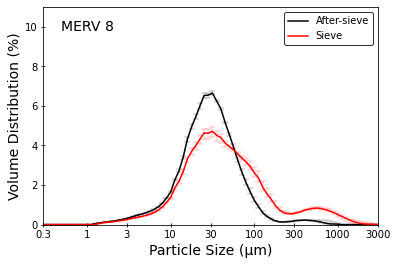

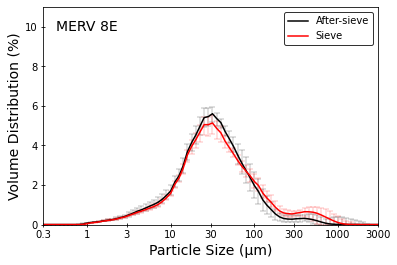

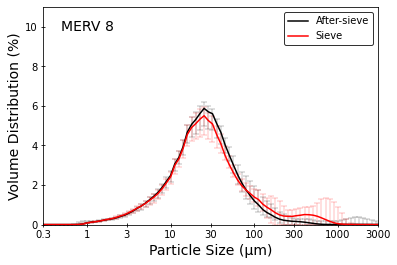

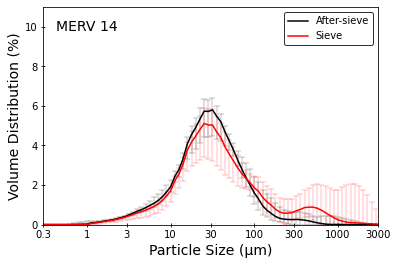

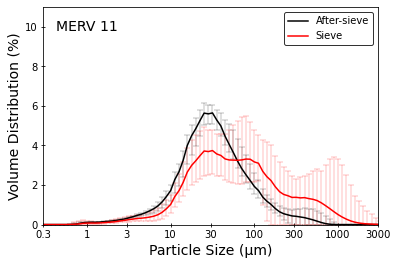

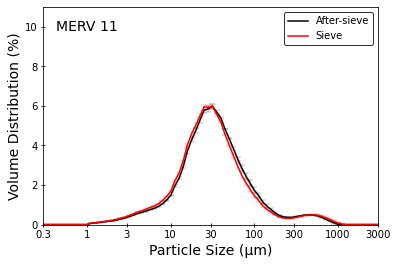

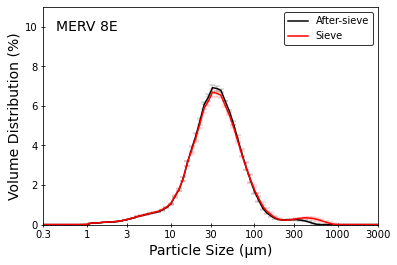

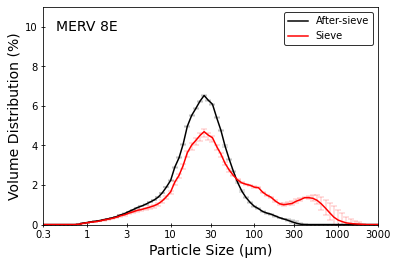

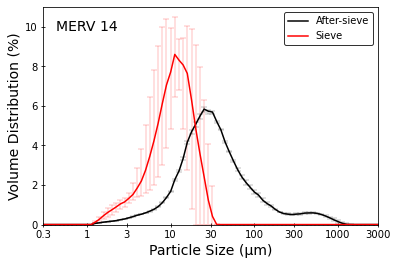

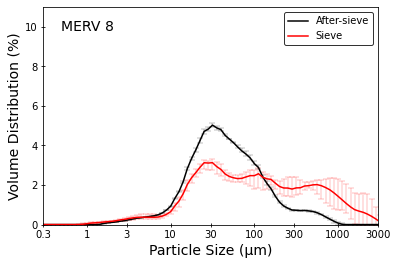

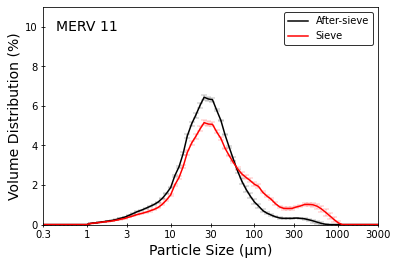

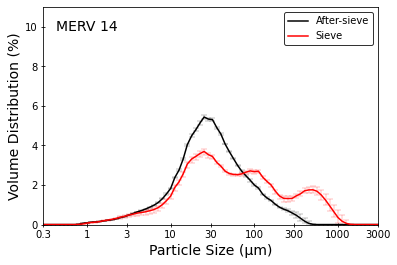

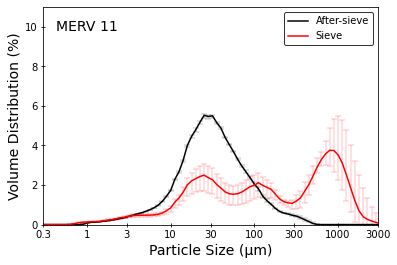

In [5]:
#################################################################################################################
### Step 2: Loop over all the filter dust with both after-sieve and sieve PSD measured and sketch the figures ###
#################################################################################################################

i = 0
for item in sn_list:
    y1 = df[str([col for col in df.columns if (item + '_D' in col) & ('mean' in col)][0])]
    y1_er_min = df[str([col for col in df.columns if (item + '_D' in col) & ('min' in col)][0])]
    y1_er_max = df[str([col for col in df.columns if (item + '_D' in col) & ('max' in col)][0])]
    
    y2 = df[str([col for col in df.columns if (item + '_S' in col) & ('mean' in col)][0])]
    y2_er_min = df[str([col for col in df.columns if (item + '_S' in col) & ('min' in col)][0])]
    y2_er_max = df[str([col for col in df.columns if (item + '_S' in col) & ('max' in col)][0])]
    
    plt.figure()
    plt.errorbar(size, y1, yerr = [y1_er_min,y1_er_max], xerr = None, 
                 capsize = 3, c = "k", ecolor = 'k', elinewidth = 0.25, capthick = 0.25, label = 'After-sieve')
    
    plt.errorbar(size, y2, yerr = [y2_er_min,y2_er_max], xerr = None, 
                 capsize = 3, c = "r", ecolor = 'r', elinewidth = 0.25, capthick = 0.25, label = 'Sieve')
    
    # plt.plot(size, y1, c = "k", lw = 1, label = 'After-sieve')
    # plt.plot(size, y2, c = "r", lw = 1, label = 'Sieve')
    
    plt.xscale('log')
       
    a = [0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    plt.xlim(0.3, 3000)
    plt.xticks(ticks = a, labels = a)
    plt.minorticks_off()
    plt.xlabel('Particle Size (µm)', size = 14)

    plt.ylim(0, 11)
    plt.yticks(np.arange(0, 11, step=2))
    plt.ylabel('Volume Distribution (%)', size = 14)

    plt.tick_params(axis = 'both', direction = 'inout')
    
    
    ## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    for h in handles:
        #only need to edit the errorbar legend entries
        if isinstance(h, container.ErrorbarContainer):
            new_handles.append(h[0])
        else:
            new_handles.append(h)
    ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black')
    
    
    # plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
    plt.text(1, 10, 'MERV ' + filt_list[i], ha = 'center', va = 'center', fontsize = 14)
    
    i += 1
    
    plt.savefig(r'Figure_s1_' + item + '.jpg', format='jpg', dpi=1600, bbox_inches='tight')
